# The Cancer Gene Atlas Cancer (TCGA) - Cholangiocarcinoma (CHOL)

Author: Moshe Silverstein <br/>
Date: 7-17 <br/>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Fri Apr 20 12:19:59 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:4])

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
        if str(col.split('-')[3]) == '01A':
            sampleType = 'Primary Solid Tumor'
        elif str(col.split('-')[3]) == '11A':
            sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+sampleType,
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

# Path to Output Files

In [9]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [10]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [11]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [12]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [13]:
sample_meta = pd.read_csv('Input/metadata_Cholangiocarcinoma [CHOL]', sep='\t', index_col=1)

In [14]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-WD-A7RX,3371,CHOL,TCGA,4290B3B3-94F6-43E4-8309-430DD973AE2D,WD,71.0,NaN,428,Nationwide Children's Hospital,NaN,...,23.6,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-3X-AAVA,3396,CHOL,TCGA,FE57B639-DB7A-460F-ADFE-552F1E034E46,3X,50.0,NaN,428,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-3X-AAV9,3397,CHOL,TCGA,41B97B11-ACAA-4FBC-B3B0-0ABC1BCAC13B,3X,72.0,NaN,428,Nationwide Children's Hospital,NaN,...,18.2,NaN,NaN,"Yes, History of Prior Malignancy",Rectosigmoid Junction,"Other, specify",Prior Malignancy,NaN,NaN,NaN
TCGA-3X-AAVE,3398,CHOL,TCGA,DCC87C59-FD8C-4511-9983-96D5B9784CB0,3X,60.0,NaN,428,Nationwide Children's Hospital,NaN,...,23.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-4G-AAZG,3399,CHOL,TCGA,C60EB7BE-C85C-4338-A20B-51948D43BF2A,4G,75.0,NaN,448,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,"Yes, History of Prior Malignancy",Sigmoid colon,Colon Adenocarcinoma,Prior Malignancy,NaN,NaN,NaN


In [15]:
sample_meta.shape

(45, 70)

# Load Data

In [16]:
matrix = pd.read_csv('Input/TCGA_CHOL_tpm.tsv', sep='\t', index_col=0)

In [17]:
matrix.head()

,5c8689a9-2927-4769-b85f-bc8e656ad939,ead7dc71-0bd6-40b5-9299-a5a2e52b4bc6,3457cb70-f9ed-4e80-8493-f6585d29de6e,6563c29e-b3b6-4de8-808f-c1e854678d52,fa037f92-f9f1-4891-baaa-414d9114110a,02d6f2e6-12e3-4e94-a275-aaa63fb3ee78,9812e6b3-0951-4297-8928-ee3e73641037,b1265f9f-8a2e-4cfe-8f4c-ea6c0b8fb035,06eff709-06bf-46f3-b0c3-f9d4b17839c9,bb2976fa-74fa-43b3-80e0-e4b9572fcb9e,...,f95fc0f3-5e5c-41de-8ed6-5962f73aa724,ad1e297a-0ec0-48ce-855f-213ea257d078,d1649137-aa3d-40b7-bb5c-e34ef7129b2a,1c37a997-32d3-449c-bfaa-0e37d6c05899,69e4f26f-729a-4647-8007-05225b707e2f,e6a0bc92-60f5-4bb3-81cb-d64e1cb44284,b7fa549e-8ee0-4a33-adc4-c1ad640f8200,895543f6-b56e-49de-b80f-5d3cb901f445,3e4af8dd-0e47-4784-ad0c-ec72b334eb1d,fefb0871-9acd-45d3-b263-9c93c6dba251
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,138.2640,329.481000,55.470400,105.2930,179.66000,173.491000,195.174000,106.32100,171.335000,224.8920,...,117.175000,161.06300,130.7000,126.722000,285.666000,298.6850,135.563000,154.89500,243.269000,50.333100
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,33.8500,33.477500,12.220400,10.4934,83.05600,18.890500,42.033600,9.36097,43.433600,41.4487,...,39.526900,41.32680,76.5006,28.830600,5.607180,36.0067,29.803100,76.57580,44.130100,13.974000
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,52.8426,40.363500,13.842900,88.0485,28.43200,25.296700,9.647710,10.37090,43.735600,19.0994,...,25.998300,25.18990,15.8041,18.141000,14.367900,59.8097,8.941980,35.40040,53.426000,11.940200
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,65.5811,64.243200,15.460200,45.7033,123.86300,39.404200,79.274100,9.82045,59.277200,29.5588,...,56.578800,39.44120,129.7400,22.113500,49.291100,89.0085,48.047000,72.28260,54.143700,19.664700
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.0000,0.092509,0.163815,0.0000,1.41571,0.044924,0.544701,0.00000,0.100855,0.0000,...,0.202579,9.44028,20.7876,0.322997,0.219274,0.0000,0.212547,1.52245,0.427771,0.043572


In [18]:
matrix.shape

(199169, 45)

# Get Only Protein Coding Genes

In [19]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [20]:
matrix.head()

,5c8689a9-2927-4769-b85f-bc8e656ad939,ead7dc71-0bd6-40b5-9299-a5a2e52b4bc6,3457cb70-f9ed-4e80-8493-f6585d29de6e,6563c29e-b3b6-4de8-808f-c1e854678d52,fa037f92-f9f1-4891-baaa-414d9114110a,02d6f2e6-12e3-4e94-a275-aaa63fb3ee78,9812e6b3-0951-4297-8928-ee3e73641037,b1265f9f-8a2e-4cfe-8f4c-ea6c0b8fb035,06eff709-06bf-46f3-b0c3-f9d4b17839c9,bb2976fa-74fa-43b3-80e0-e4b9572fcb9e,...,f95fc0f3-5e5c-41de-8ed6-5962f73aa724,ad1e297a-0ec0-48ce-855f-213ea257d078,d1649137-aa3d-40b7-bb5c-e34ef7129b2a,1c37a997-32d3-449c-bfaa-0e37d6c05899,69e4f26f-729a-4647-8007-05225b707e2f,e6a0bc92-60f5-4bb3-81cb-d64e1cb44284,b7fa549e-8ee0-4a33-adc4-c1ad640f8200,895543f6-b56e-49de-b80f-5d3cb901f445,3e4af8dd-0e47-4784-ad0c-ec72b334eb1d,fefb0871-9acd-45d3-b263-9c93c6dba251
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,138.2640,329.481000,55.470400,105.2930,179.66000,173.491000,195.174000,106.32100,171.335000,224.8920,...,117.175000,161.06300,130.7000,126.722000,285.666000,298.6850,135.563000,154.89500,243.269000,50.333100
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,33.8500,33.477500,12.220400,10.4934,83.05600,18.890500,42.033600,9.36097,43.433600,41.4487,...,39.526900,41.32680,76.5006,28.830600,5.607180,36.0067,29.803100,76.57580,44.130100,13.974000
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,52.8426,40.363500,13.842900,88.0485,28.43200,25.296700,9.647710,10.37090,43.735600,19.0994,...,25.998300,25.18990,15.8041,18.141000,14.367900,59.8097,8.941980,35.40040,53.426000,11.940200
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,65.5811,64.243200,15.460200,45.7033,123.86300,39.404200,79.274100,9.82045,59.277200,29.5588,...,56.578800,39.44120,129.7400,22.113500,49.291100,89.0085,48.047000,72.28260,54.143700,19.664700
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.0000,0.092509,0.163815,0.0000,1.41571,0.044924,0.544701,0.00000,0.100855,0.0000,...,0.202579,9.44028,20.7876,0.322997,0.219274,0.0000,0.212547,1.52245,0.427771,0.043572


In [21]:
matrix.shape 

(79930, 45)

# Map Sample Meta Data to Sample ID

In [22]:
getSampleID(matrix, meta)

In [23]:
matrix.head()

,TCGA-W5-AA2U-01A,TCGA-W5-AA38-01A,TCGA-W5-AA34-11A,TCGA-W5-AA39-01A,TCGA-ZH-A8Y5-01A,TCGA-YR-A95A-01A,TCGA-W5-AA2X-01A,TCGA-W5-AA2H-01A,TCGA-ZH-A8Y4-01A,TCGA-ZH-A8Y2-01A,...,TCGA-W5-AA2R-01A,TCGA-W5-AA2Q-01A,TCGA-W5-AA31-01A,TCGA-3X-AAV9-01A,TCGA-W5-AA2I-01A,TCGA-W5-AA2O-01A,TCGA-W5-AA30-01A,TCGA-W5-AA2Z-01A,TCGA-ZH-A8Y6-01A,TCGA-W5-AA31-11A
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,138.2640,329.481000,55.470400,105.2930,179.66000,173.491000,195.174000,106.32100,171.335000,224.8920,...,117.175000,161.06300,130.7000,126.722000,285.666000,298.6850,135.563000,154.89500,243.269000,50.333100
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,33.8500,33.477500,12.220400,10.4934,83.05600,18.890500,42.033600,9.36097,43.433600,41.4487,...,39.526900,41.32680,76.5006,28.830600,5.607180,36.0067,29.803100,76.57580,44.130100,13.974000
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,52.8426,40.363500,13.842900,88.0485,28.43200,25.296700,9.647710,10.37090,43.735600,19.0994,...,25.998300,25.18990,15.8041,18.141000,14.367900,59.8097,8.941980,35.40040,53.426000,11.940200
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,65.5811,64.243200,15.460200,45.7033,123.86300,39.404200,79.274100,9.82045,59.277200,29.5588,...,56.578800,39.44120,129.7400,22.113500,49.291100,89.0085,48.047000,72.28260,54.143700,19.664700
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.0000,0.092509,0.163815,0.0000,1.41571,0.044924,0.544701,0.00000,0.100855,0.0000,...,0.202579,9.44028,20.7876,0.322997,0.219274,0.0000,0.212547,1.52245,0.427771,0.043572


# Map Gene Symbol to Gene ID

In [24]:
getGenes(matrix)

In [25]:
matrix.head()

,TCGA-W5-AA2U-01A,TCGA-W5-AA38-01A,TCGA-W5-AA34-11A,TCGA-W5-AA39-01A,TCGA-ZH-A8Y5-01A,TCGA-YR-A95A-01A,TCGA-W5-AA2X-01A,TCGA-W5-AA2H-01A,TCGA-ZH-A8Y4-01A,TCGA-ZH-A8Y2-01A,...,TCGA-W5-AA2R-01A,TCGA-W5-AA2Q-01A,TCGA-W5-AA31-01A,TCGA-3X-AAV9-01A,TCGA-W5-AA2I-01A,TCGA-W5-AA2O-01A,TCGA-W5-AA30-01A,TCGA-W5-AA2Z-01A,TCGA-ZH-A8Y6-01A,TCGA-W5-AA31-11A
ARF5,138.2640,329.481000,55.470400,105.2930,179.66000,173.491000,195.174000,106.32100,171.335000,224.8920,...,117.175000,161.06300,130.7000,126.722000,285.666000,298.6850,135.563000,154.89500,243.269000,50.333100
M6PR,33.8500,33.477500,12.220400,10.4934,83.05600,18.890500,42.033600,9.36097,43.433600,41.4487,...,39.526900,41.32680,76.5006,28.830600,5.607180,36.0067,29.803100,76.57580,44.130100,13.974000
ESRRA,52.8426,40.363500,13.842900,88.0485,28.43200,25.296700,9.647710,10.37090,43.735600,19.0994,...,25.998300,25.18990,15.8041,18.141000,14.367900,59.8097,8.941980,35.40040,53.426000,11.940200
FKBP4,65.5811,64.243200,15.460200,45.7033,123.86300,39.404200,79.274100,9.82045,59.277200,29.5588,...,56.578800,39.44120,129.7400,22.113500,49.291100,89.0085,48.047000,72.28260,54.143700,19.664700
CYP26B1,0.0000,0.092509,0.163815,0.0000,1.41571,0.044924,0.544701,0.00000,0.100855,0.0000,...,0.202579,9.44028,20.7876,0.322997,0.219274,0.0000,0.212547,1.52245,0.427771,0.043572


# Histogram of First Sample

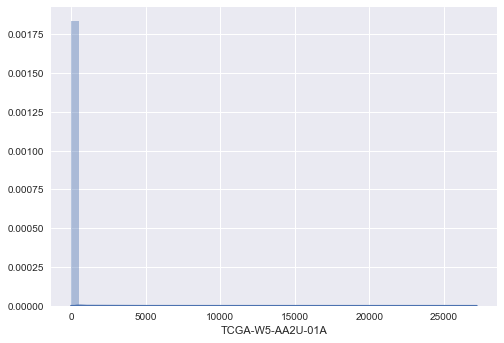

In [26]:
# matrix.iloc[:, 0].hist(bins=100, log=True);
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

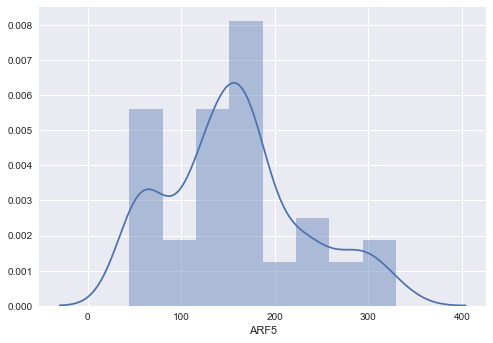

In [27]:
# matrix.iloc[0, :].hist(bins=100);
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [28]:
filename = path+'tcga_chol_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [29]:
normalized_matrix = matrix.copy()

In [30]:
# normalized_matrix = normalized_matrix.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-W5-AA2U-01A,TCGA-W5-AA38-01A,TCGA-W5-AA34-11A,TCGA-W5-AA39-01A,TCGA-ZH-A8Y5-01A,TCGA-YR-A95A-01A,TCGA-W5-AA2X-01A,TCGA-W5-AA2H-01A,TCGA-ZH-A8Y4-01A,TCGA-ZH-A8Y2-01A,...,TCGA-W5-AA2R-01A,TCGA-W5-AA2Q-01A,TCGA-W5-AA31-01A,TCGA-3X-AAV9-01A,TCGA-W5-AA2I-01A,TCGA-W5-AA2O-01A,TCGA-W5-AA30-01A,TCGA-W5-AA2Z-01A,TCGA-ZH-A8Y6-01A,TCGA-W5-AA31-11A
A1BG,0.153043,311.030176,759.438000,10.26270,311.030176,72.07510,1.307900,311.030176,31.742700,311.030176,...,311.030176,311.030176,128.004000,311.030176,15.939000,115.907000,311.030176,311.030176,311.030176,756.378000
A1CF,11.158100,1.905820,24.749100,15.45130,2.936980,7.13363,0.443708,0.009700,1.142500,15.562400,...,22.938800,3.572880,12.601900,0.326515,7.196410,5.476740,4.005180,5.217060,37.955700,34.550100
A2M,105.652000,48.644800,860.550000,497.17800,140.052000,55.43500,17.935800,37.786500,76.592200,106.554000,...,82.523700,75.864300,308.746000,220.416000,14.670800,63.441500,135.601000,148.249000,306.415000,742.331000
A2ML1,0.089011,0.022497,0.127668,0.03569,0.165869,0.06561,0.140649,0.071332,0.203480,0.113547,...,0.092407,0.106590,0.122404,0.197235,0.058365,0.079761,0.157338,0.183829,0.052066,0.028831
A3GALT2,0.022813,0.024830,0.045519,0.07956,0.045519,0.02201,0.023619,0.045519,0.045519,0.193128,...,0.023783,0.045519,0.021355,0.021992,0.041678,0.022785,0.045519,0.045519,0.027765,0.045519


In [34]:
normalized_matrix.shape

(19119, 45)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [36]:
# normalized_matrix = mf.log2(normalized_matrix)

In [37]:
normalized_matrix.head()

,TCGA-W5-AA2U-01A,TCGA-W5-AA38-01A,TCGA-W5-AA34-11A,TCGA-W5-AA39-01A,TCGA-ZH-A8Y5-01A,TCGA-YR-A95A-01A,TCGA-W5-AA2X-01A,TCGA-W5-AA2H-01A,TCGA-ZH-A8Y4-01A,TCGA-ZH-A8Y2-01A,...,TCGA-W5-AA2R-01A,TCGA-W5-AA2Q-01A,TCGA-W5-AA31-01A,TCGA-3X-AAV9-01A,TCGA-W5-AA2I-01A,TCGA-W5-AA2O-01A,TCGA-W5-AA30-01A,TCGA-W5-AA2Z-01A,TCGA-ZH-A8Y6-01A,TCGA-W5-AA31-11A
A1BG,-0.635307,2.668350,3.009051,1.185741,2.684690,2.025314,0.316352,2.727857,1.667220,2.690894,...,2.781576,2.680470,2.296183,2.787271,1.366147,2.244515,2.722515,2.676897,2.675818,3.023662
A1CF,1.227470,0.455629,1.522118,1.363445,0.659789,1.020839,-0.153126,-1.778162,0.223433,1.390168,...,1.649345,0.740686,1.289396,-0.191629,1.020802,0.918927,0.832335,0.901521,1.762292,1.683373
A2M,2.203757,1.862584,3.063335,2.870992,2.338177,1.911312,1.453498,1.812391,2.049761,2.225661,...,2.205353,2.067705,2.678561,2.637711,1.330140,1.982779,2.361976,2.355087,2.669325,3.015521
A2ML1,-0.870676,-1.472321,-0.765359,-1.272970,-0.588347,-1.015504,-0.652086,-0.911663,-0.525902,-0.746733,...,-0.745520,-0.784616,-0.723245,-0.410548,-1.070162,-0.917805,-0.573454,-0.551491,-1.100434,-1.395220
A3GALT2,-1.461944,-1.429474,-1.213250,-0.924826,-1.149921,-1.489846,-1.426952,-1.106755,-1.176233,-0.516064,...,-1.334956,-1.154141,-1.481533,-1.363269,-1.216404,-1.461946,-1.112096,-1.157714,-1.373487,-1.196886


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [38]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [39]:
normalized_matrix.head()

,TCGA-W5-AA2U-01A,TCGA-W5-AA38-01A,TCGA-W5-AA34-11A,TCGA-W5-AA39-01A,TCGA-ZH-A8Y5-01A,TCGA-YR-A95A-01A,TCGA-W5-AA2X-01A,TCGA-W5-AA2H-01A,TCGA-ZH-A8Y4-01A,TCGA-ZH-A8Y2-01A,...,TCGA-W5-AA2R-01A,TCGA-W5-AA2Q-01A,TCGA-W5-AA31-01A,TCGA-3X-AAV9-01A,TCGA-W5-AA2I-01A,TCGA-W5-AA2O-01A,TCGA-W5-AA30-01A,TCGA-W5-AA2Z-01A,TCGA-ZH-A8Y6-01A,TCGA-W5-AA31-11A
A1BG,-0.686624,2.526942,3.267297,1.255333,2.598549,2.097679,0.269374,2.798350,1.617802,2.640540,...,2.768488,2.679911,2.189177,2.784230,1.459776,2.241181,2.760382,2.665708,2.586793,3.157920
A1CF,1.139667,0.486966,1.795669,1.416406,0.501445,1.084607,-0.198783,-1.755262,0.187184,1.215622,...,1.484803,0.572120,1.116869,-0.484287,1.135614,0.934530,0.669222,0.692563,1.577676,1.869602
A2M,2.208394,1.739787,3.328775,2.953584,2.213325,1.986265,1.421609,1.913918,2.023540,2.136756,...,2.124445,2.000598,2.609372,2.617914,1.425770,1.978798,2.410830,2.320237,2.574211,3.152655
A2ML1,-0.906041,-1.410800,-0.420070,-1.288878,-0.628492,-0.981237,-0.711654,-0.942824,-0.557023,-0.875467,...,-0.932544,-0.847494,-0.821350,-0.670692,-0.945721,-0.859153,-0.757074,-0.672325,-1.173276,-1.244941
A3GALT2,-1.474361,-1.365304,-0.960062,-0.906041,-1.153038,-1.453716,-1.477313,-1.139110,-1.192162,-0.661016,...,-1.490300,-1.200680,-1.508766,-1.543245,-1.107885,-1.420043,-1.233888,-1.224912,-1.441858,-1.017249


# Normalize Matrix (z-score the rows)

In [40]:
mf.zscore(normalized_matrix, 'row')

In [41]:
normalized_matrix.head()

,TCGA-W5-AA2U-01A,TCGA-W5-AA38-01A,TCGA-W5-AA34-11A,TCGA-W5-AA39-01A,TCGA-ZH-A8Y5-01A,TCGA-YR-A95A-01A,TCGA-W5-AA2X-01A,TCGA-W5-AA2H-01A,TCGA-ZH-A8Y4-01A,TCGA-ZH-A8Y2-01A,...,TCGA-W5-AA2R-01A,TCGA-W5-AA2Q-01A,TCGA-W5-AA31-01A,TCGA-3X-AAV9-01A,TCGA-W5-AA2I-01A,TCGA-W5-AA2O-01A,TCGA-W5-AA30-01A,TCGA-W5-AA2Z-01A,TCGA-ZH-A8Y6-01A,TCGA-W5-AA31-11A
A1BG,-4.093073,-0.107968,0.810137,-1.684876,-0.019169,-0.640292,-2.907551,0.228601,-1.235382,0.032904,...,0.191571,0.081727,-0.526827,0.211091,-1.431347,-0.462337,0.181518,0.064114,-0.033747,0.674500
A1CF,0.114284,-0.720525,0.953315,0.468234,-0.702006,0.043861,-1.597602,-3.588349,-1.103948,0.211431,...,0.555715,-0.611613,0.085125,-1.962763,0.109100,-0.148088,-0.487419,-0.457566,0.674500,1.047875
A2M,0.000000,-1.073348,2.566242,1.706864,0.011294,-0.508789,-1.802139,-0.674500,-0.423410,-0.164086,...,-0.192285,-0.475959,0.918443,0.938009,-1.792608,-0.525891,0.463680,0.256177,0.837907,2.162838
A2ML1,0.077014,-1.389739,1.489173,-1.035453,0.883531,-0.141494,0.641874,-0.029871,1.091208,0.165858,...,0.000000,0.247144,0.323113,0.760902,-0.038289,0.213264,0.509888,0.756157,-0.699532,-0.907780
A3GALT2,-1.073353,-0.606577,1.127919,1.359139,0.301953,-0.984991,-1.085991,0.361567,0.134497,2.407880,...,-1.141578,0.098040,-1.220612,-1.368188,0.495216,-0.840868,-0.044096,-0.005678,-0.934238,0.883150


In [42]:
normalized_matrix.shape

(19119, 45)

# Merge Like Column (by taking the mean)

In [43]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [44]:
normalized_matrix.shape

(19119, 45)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [45]:
mf.mapgenesymbols(normalized_matrix)

In [46]:
normalized_matrix.shape

(18681, 45)

# Merge Duplicate Genes By Rows

In [47]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [48]:
normalized_matrix.shape

(18589, 45)

In [49]:
normalized_matrix.head()

,TCGA-3X-AAV9-01A,TCGA-3X-AAVA-01A,TCGA-3X-AAVB-01A,TCGA-3X-AAVC-01A,TCGA-3X-AAVE-01A,TCGA-4G-AAZO-01A,TCGA-4G-AAZT-01A,TCGA-W5-AA2G-01A,TCGA-W5-AA2H-01A,TCGA-W5-AA2I-01A,...,TCGA-YR-A95A-01A,TCGA-ZD-A8I3-01A,TCGA-ZH-A8Y1-01A,TCGA-ZH-A8Y2-01A,TCGA-ZH-A8Y4-01A,TCGA-ZH-A8Y5-01A,TCGA-ZH-A8Y6-01A,TCGA-ZH-A8Y8-01A,TCGA-ZU-A8S4-01A,TCGA-ZU-A8S4-11A
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0.211091,-2.874759,-0.053772,0.056179,-2.945989,0.018583,0.018583,0.000000,0.228601,-1.431347,...,-0.640292,-4.830222,-4.763764,0.032904,-1.235382,-0.019169,-0.033747,-1.141164,-2.462707,0.778138
A1CF,-1.962763,-0.888787,-2.034256,0.010110,-1.191953,0.013006,-0.030079,0.042337,-3.588349,0.109100,...,0.043861,0.000000,-0.763092,0.211431,-1.103948,-0.702006,0.674500,-0.512198,-0.931871,0.899561
A2M,0.938009,-0.477938,0.036911,-0.284610,-0.214719,-1.355452,-0.587490,0.390019,-0.674500,-1.792608,...,-0.508789,-0.518086,0.454226,-0.164086,-0.423410,0.011294,0.837907,0.433604,-0.148241,1.807062
A2ML1,0.760902,0.695726,-0.515091,3.019277,-0.311422,0.886761,0.260438,1.147658,-0.029871,-0.038289,...,-0.141494,0.012660,-0.785402,0.165858,1.091208,0.883531,-0.699532,0.003977,-0.674500,-2.057598
A3GALT2,-1.368188,1.313174,-0.135369,-0.639937,-0.970892,2.132167,0.563544,0.266336,0.361567,0.495216,...,-0.984991,0.000000,0.551671,2.407880,0.134497,0.301953,-0.934238,-1.282978,-0.753099,-0.638443


# Histogram of First Sample

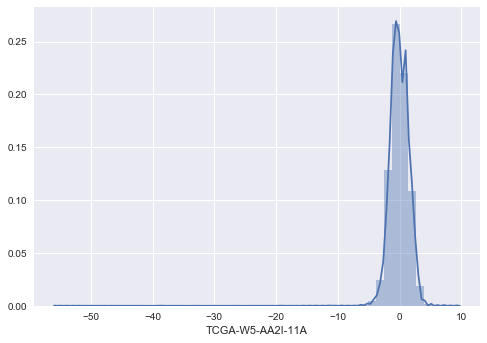

In [50]:
# normalized_matrix.iloc[:, 0].hist(bins=100, log=True);
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

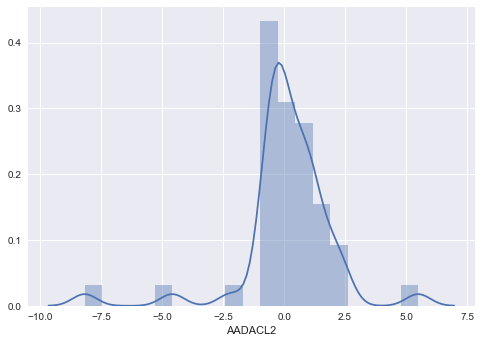

In [51]:
# normalized_matrix.iloc[100, :].hist(bins=10);
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_chol_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18589, 2)

# Save Gene List

In [56]:
filename = path+'tcga_chol_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
    metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
    metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
    metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
    metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
    metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
    metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
    if str(index.split('-')[3]) == '01A':
        sampleType = 'Primary Solid Tumor'
    elif str(index.split('-')[3]) == '11A':
        sampleType= 'Solid Tissue Normal'
    metaData.loc[index, 'Sample Type'] = sampleType
    metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
    metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-3X-AAV9-01A,72,MALE,M0,N0,T1,Stage I,Cholangiocarcinoma; intrahepatic,Primary Solid Tumor,Bile duct,G2
TCGA-3X-AAVA-01A,50,FEMALE,M0,NX,T2b,Stage II,Cholangiocarcinoma; intrahepatic,Primary Solid Tumor,Bile duct,G2
TCGA-3X-AAVB-01A,70,FEMALE,M1,N1,T3,Stage IVB,Cholangiocarcinoma; distal,Primary Solid Tumor,Bile duct,G1
TCGA-3X-AAVC-01A,72,FEMALE,M0,N0,T1,Stage I,Cholangiocarcinoma; hilar/perihilar,Primary Solid Tumor,Bile duct,G3
TCGA-3X-AAVE-01A,60,MALE,M0,N0,T2,Stage II,Cholangiocarcinoma; intrahepatic,Primary Solid Tumor,Bile duct,G2


In [60]:
attribute_list.shape

(45, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_chol_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-3X-AAV9-01A,TCGA-3X-AAVA-01A,TCGA-3X-AAVB-01A,TCGA-3X-AAVC-01A,TCGA-3X-AAVE-01A,TCGA-4G-AAZO-01A,TCGA-4G-AAZT-01A,TCGA-W5-AA2G-01A,TCGA-W5-AA2H-01A,TCGA-W5-AA2I-01A,...,TCGA-YR-A95A-01A,TCGA-ZD-A8I3-01A,TCGA-ZH-A8Y1-01A,TCGA-ZH-A8Y2-01A,TCGA-ZH-A8Y4-01A,TCGA-ZH-A8Y5-01A,TCGA-ZH-A8Y6-01A,TCGA-ZH-A8Y8-01A,TCGA-ZU-A8S4-01A,TCGA-ZU-A8S4-11A
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.506888,-0.648624,-0.159953,0.284568,-0.737365,0.151141,0.151141,-0.026586,0.551359,-0.515298,...,-0.382025,-1.003769,-0.959446,0.195653,-0.470858,-0.070988,-0.115420,-0.426481,-0.604101,0.729168
A1CF,-0.873730,-0.562781,-0.918167,0.059221,-0.696017,0.103606,-0.029644,0.148081,-0.962509,0.325895,...,0.192478,0.014721,-0.518413,0.459207,-0.651697,-0.429544,0.592748,-0.340707,-0.607317,0.726024
A2M,0.461205,-0.383139,0.061167,-0.249846,-0.205509,-0.871760,-0.560814,0.150003,-0.649779,-0.960572,...,-0.427638,-0.471973,0.239045,-0.116601,-0.294252,0.016754,0.372371,0.194512,-0.072114,0.772546
A2ML1,0.681582,0.592748,-0.340707,0.993169,-0.251775,0.770514,0.325895,0.904098,-0.029644,-0.074096,...,-0.118552,0.103606,-0.562781,0.192478,0.859632,0.726024,-0.473926,0.059221,-0.429544,-0.784908
A3GALT2,-0.962509,0.814989,-0.163080,-0.340707,-0.607317,0.904098,0.592748,0.192478,0.281465,0.459207,...,-0.651697,0.014721,0.548229,0.993169,0.103606,0.237013,-0.562781,-0.918167,-0.429544,-0.296225


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

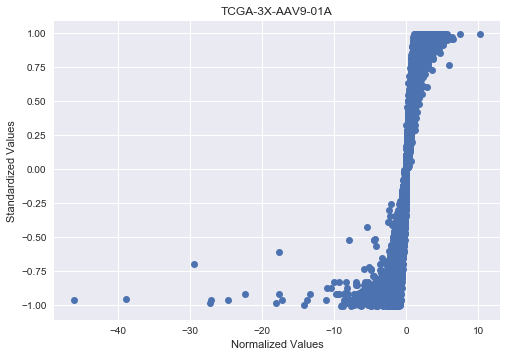

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_chol_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-3X-AAV9-01A,TCGA-3X-AAVA-01A,TCGA-3X-AAVB-01A,TCGA-3X-AAVC-01A,TCGA-3X-AAVE-01A,TCGA-4G-AAZO-01A,TCGA-4G-AAZT-01A,TCGA-W5-AA2G-01A,TCGA-W5-AA2H-01A,TCGA-W5-AA2I-01A,...,TCGA-YR-A95A-01A,TCGA-ZD-A8I3-01A,TCGA-ZH-A8Y1-01A,TCGA-ZH-A8Y2-01A,TCGA-ZH-A8Y4-01A,TCGA-ZH-A8Y5-01A,TCGA-ZH-A8Y6-01A,TCGA-ZH-A8Y8-01A,TCGA-ZU-A8S4-01A,TCGA-ZU-A8S4-11A
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,-1,-1,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_chol_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_chol_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_chol_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_chol_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_chol_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta)

In [80]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [81]:
attribute_similarity_matix.head()

,"(Donor:TCGA-3X-AAV9, Age:72.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-3X-AAVA, Age:50.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-3X-AAVB, Age:70.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IVB, Histology:Cholangiocarcinoma; distal, Tissue:Bile duct, Tumor:nan, GradeG1)","(Donor:TCGA-3X-AAVC, Age:72.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; hilar/perihilar, Tissue:Bile duct, Tumor:nan, GradeG3)","(Donor:TCGA-3X-AAVE, Age:60.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-4G-AAZO, Age:71.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-4G-AAZT, Age:62.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-W5-AA2G, Age:62.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG3)","(Donor:TCGA-W5-AA2H, Age:70.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Cholangiocarcinoma; distal, Tissue:Bile duct, Tumor:nan, GradeG3)","(Donor:TCGA-W5-AA2I, Age:66.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)",...,"(Donor:TCGA-YR-A95A, Age:52.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Cholangiocarcinoma; hilar/perihilar, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-ZD-A8I3, Age:73.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG3)","(Donor:TCGA-ZH-A8Y1, Age:74.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IVA, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-ZH-A8Y2, Age:59.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-ZH-A8Y4, Age:58.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG3)","(Donor:TCGA-ZH-A8Y5, Age:69.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IVB, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG3)","(Donor:TCGA-ZH-A8Y6, Age:41.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-ZH-A8Y8, Age:73.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)","(Donor:TCGA-ZU-A8S4, Age:52.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG3)","(Donor:TCGA-ZU-A8S4, Age:52.0, Gender:MALE, SampleType:Solid Tissue Normal, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG3)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-3X-AAV9, Age:72.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Cholangiocarcinoma; intrahepatic, Tissue:Bile duct, Tumor:nan, GradeG2)",1.000000,0.030835,0.356084,0.126502,0.109737,-0.030934,-0.010330,0.049229,0.152633,-0.123779,...,-0.055915,0.044937,0.112721,0.033401,-0.017403,0.009678,0.029809,0.218641,0.226516,-0.055367
"(Donor:TCGA-3X-AAVA, Age:50.0, Gender:FEMALE, SampleType:Primary Solid Tumor, St

# HeatMap (clustergrammer) of Similarity Matrix

In [82]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [83]:
filename = path+'tcga_chol_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene Similarity Matrix

In [84]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [85]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.357603,0.357675,-0.135872,0.128829,-0.160872,-0.115065,-0.190357,-0.388866,0.192194,...,-0.404389,-0.379872,-0.058413,0.100550,0.130308,0.202047,0.286756,-0.164043,-0.313971,-0.000155
A1CF,0.357603,1.000000,0.485915,-0.216084,0.137710,-0.457446,-0.119134,-0.158101,-0.212724,0.683631,...,-0.349363,-0.337469,0.107148,0.401963,0.344332,0.425665,0.603731,-0.565139,-0.199138,0.228103
A2M,0.357675,0.485915,1.000000,-0.412431,0.052010,-0.323048,-0.459145,-0.339960,-0.569931,0.521264,...,-0.671503,-0.690235,0.076240,0.604603,0.310806,0.627081,0.713549,-0.361994,-0.122272,0.165017
A2ML1,-0.135872,-0.216084,-0.412431,1.000000,-0.017403,0.191670,0.344505,0.010754,0.412476,-0.104210,...,0.505079,0.403958,0.176262,-0.312861,-0.087878,-0.368511,-0.388689,0.352427,0.254641,0.163781
A3GALT2,0.128829,0.137710,0.052010,-0.017403,1.000000,-0.120405,0.051779,0.283289,-0.144951,0.061449,...,-0.039674,-0.161305,-0.183298,0.090534,0.055557,0.193017,-0.023775,-0.180256,0.026793,-0.207973


# Save Gene Similarity Matrix

In [86]:
filename = path+'tcga_chol_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [87]:
name = 'tcga_chol_gene_attribute_edge_list'

In [88]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  45 Out of 45   

 The number of statisticaly relevent gene-attribute associations is: 41743
